### Importing libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

output_dir = "../Reports/"
os.makedirs(output_dir, exist_ok=True)

In [40]:
df = pd.read_csv("../Data/Feature-Engineered/preprocessed_lemmatization_features.csv")  

___

#### Question : What is correlation between our numerical columns

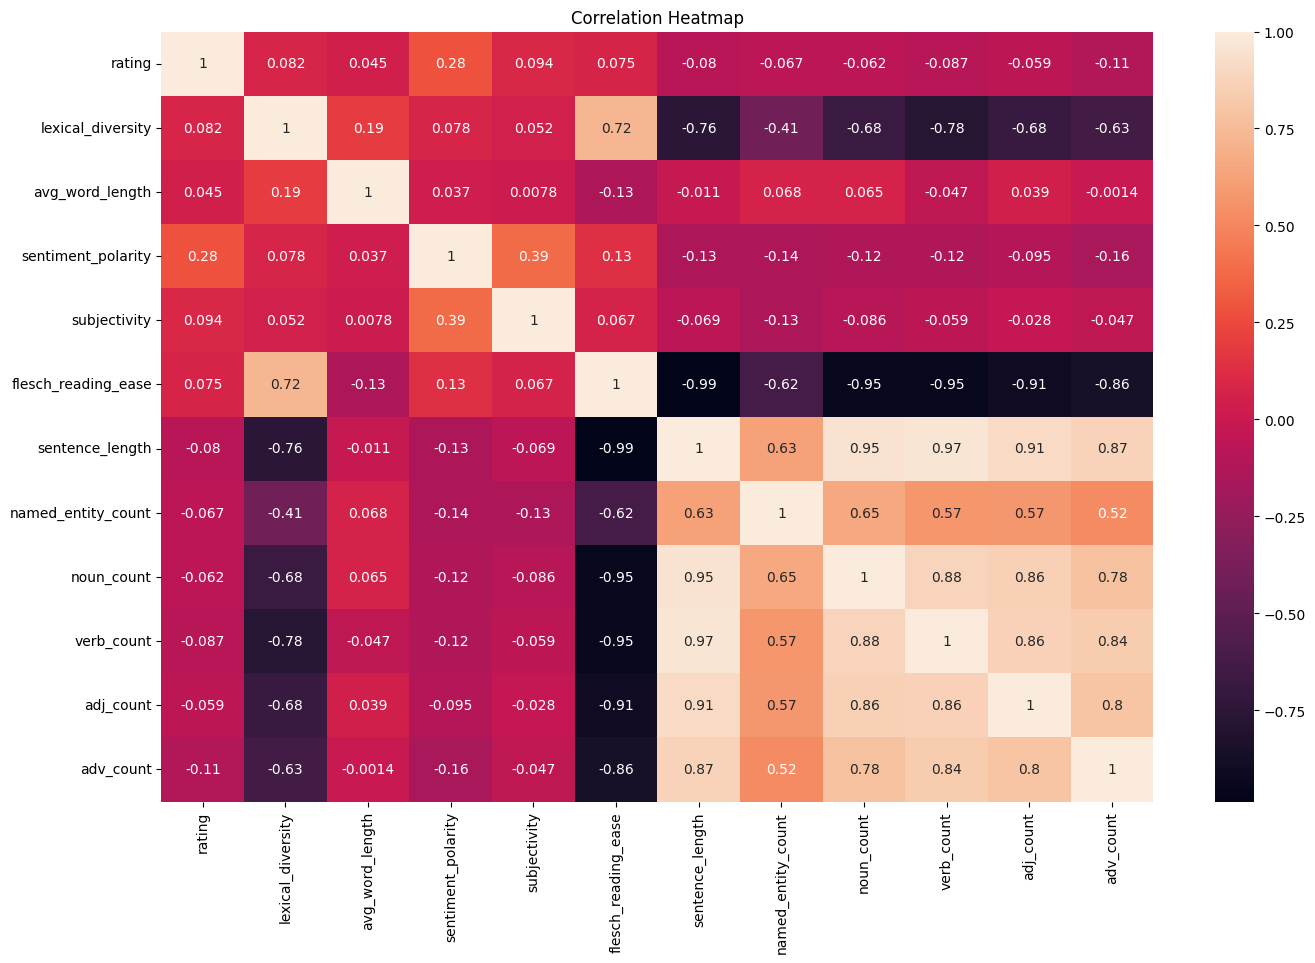

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()
plt.savefig(os.path.join(output_dir, "correlation_heatmap.png"))
plt.close()

##### Conclusion
>The most correlated columns to our target label are 
>1. 0.26 - avg_word_length
>2. 0.23 - lexical_diversity
>3. 0.15 - named_entity_count
>
>It's nice to see that our feature engineering paid off to find the correlation for the label

___

#### Question : How are ratings accross different categories

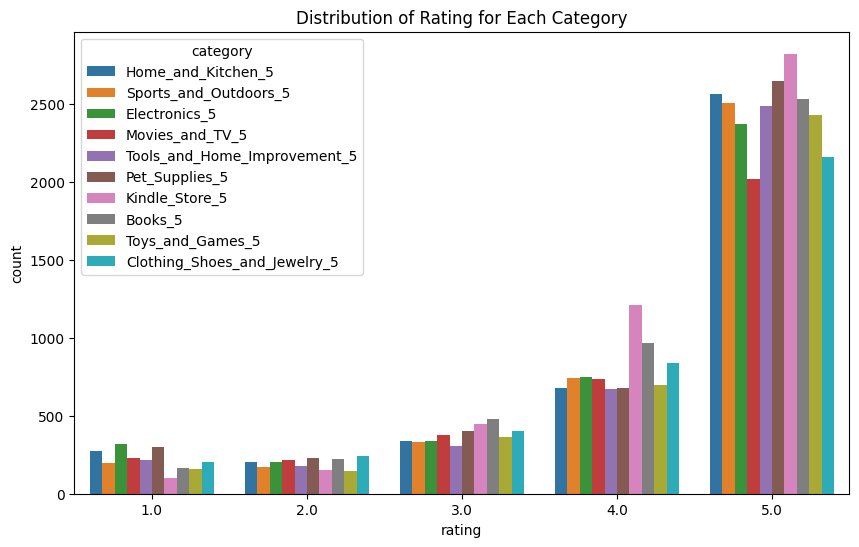

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='category', data=df)
plt.title('Distribution of Rating for Each Category')
plt.show()
plt.savefig(os.path.join(output_dir, "rating_distribution.png"))
plt.close()

##### Conclusion
>For 5 stars there is much more dip because the tachincal products get damaged during shipping which why they contain less amount of 5 stars comared to other categories
>
>After that the clothing category comes for less amount of 5 stars which might be because of variations in size and people not getting the right size

___

#### Question : How is distribution of our label accross different ratings

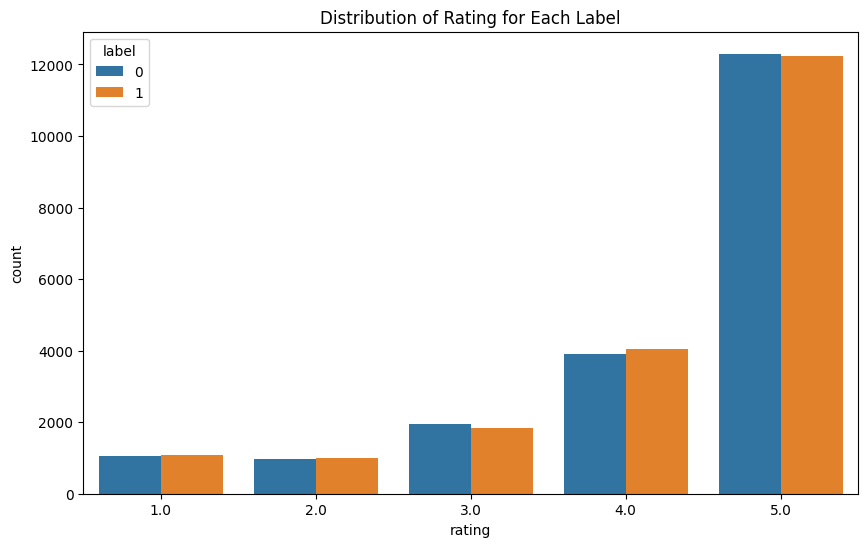

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='label', data=df)
plt.title('Distribution of Rating for Each Label')
plt.show()
plt.savefig(os.path.join(output_dir, "label_distribution_ratings.png"))
plt.close()

##### Conclusion
>The label is pretty equal accross all ratings which shows that our database is very symmteric but the frequency is very different in our dataset we have very high amount of data about 5 stars and very less on 1 or 2 stars so in future based on this databse our modal will perform very good for 5 stars but might not work very good for lower rated reviews
><br></br>

#### Question : How are our labels distributed throught different categories

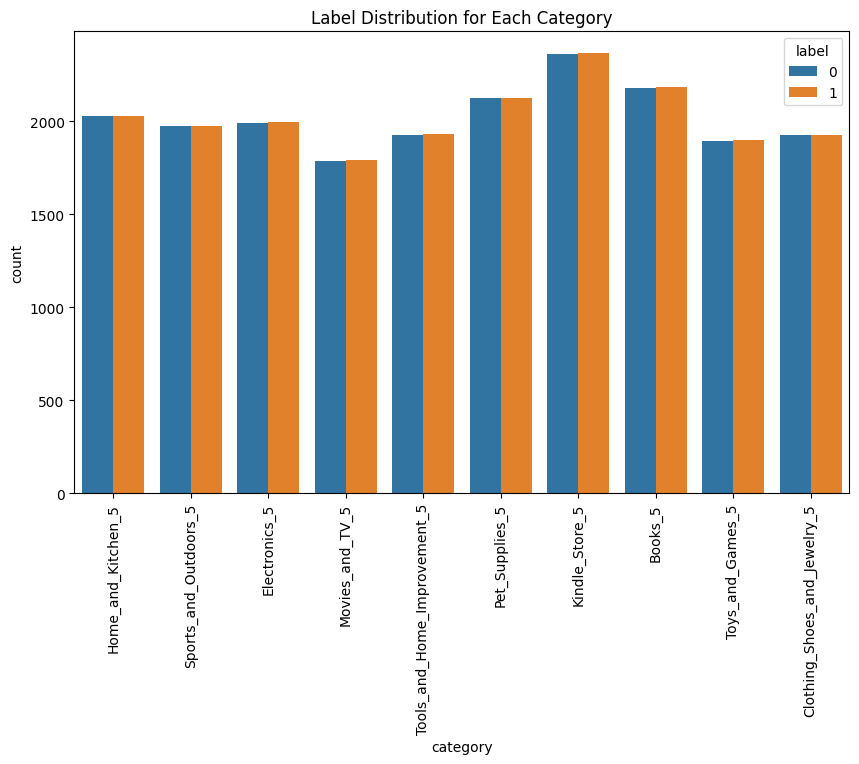

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='label', data=df)
plt.title('Label Distribution for Each Category')
plt.xticks(rotation=90)
plt.show()
plt.savefig(os.path.join(output_dir, "label_distribution_categories.png"))
plt.close()

##### Conclusion
>We have almost equal distribution of labels accross all category so our modal will perform good acorss all categories and will not be bias to any category
><br></br>

#### Question : Since lexical diversity is 2nd most correlated field how is there correlation

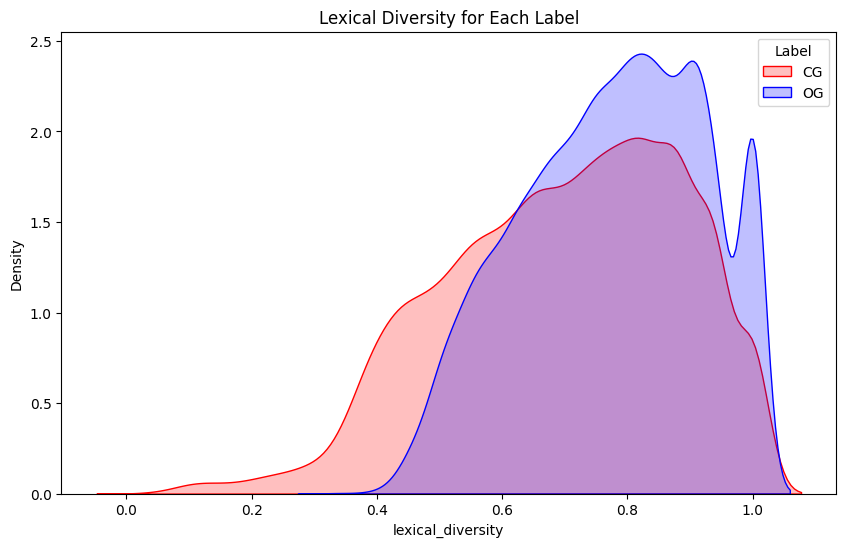

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['label'] == 0], x='lexical_diversity', fill=True, color='red', label='CG')
sns.kdeplot(data=df[df['label'] == 1], x='lexical_diversity', fill=True, color='blue', label='OG')
plt.title('Lexical Diversity for Each Label')
plt.legend(title="Label")
plt.show()
plt.savefig(os.path.join(output_dir, "lexical_diversity.png"))
plt.close()

##### Conclusion
>The lexical diversity in original message are mostly high it starts from 0.4 while the computer generated reviews also have very low lexical diversity

#### Question : How readable are the text for each label

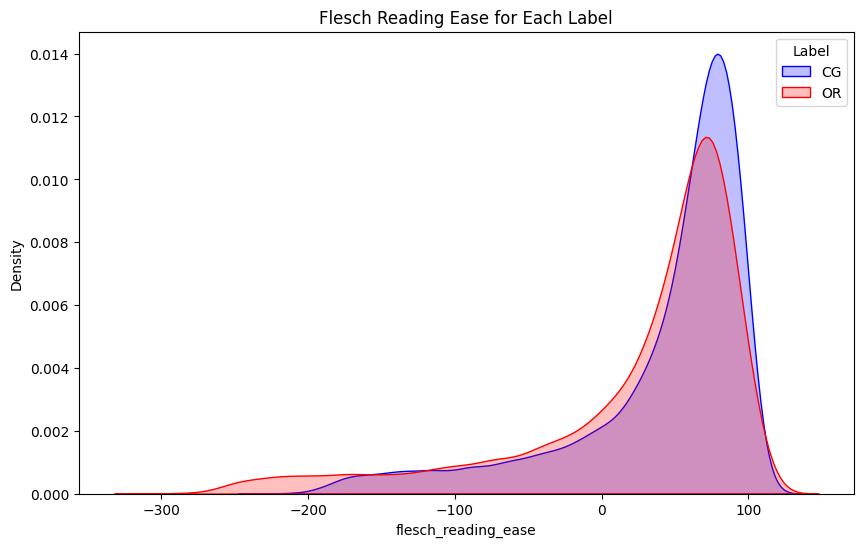

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['label'] == 0], x='flesch_reading_ease', fill=True, color='blue', label='CG')
sns.kdeplot(data=df[df['label'] == 1], x='flesch_reading_ease', fill=True, color='red', label='OR')
plt.title('Flesch Reading Ease for Each Label')
plt.legend(title="Label")
plt.show()
plt.savefig(os.path.join(output_dir, "flesch_reading_ease.png"))
plt.close()

##### Conclusion
>We can see that there is a bump on +ve side for the computer generated so based on this we can say that the computer generated code are mostly more readable than human written, which is how it should be since humans make mistakes and use different abbrivations and short forms while computer writes in proper grammer without spelling mistake
><br></br>

#### Question : So is there also a difference in setence size for our labels

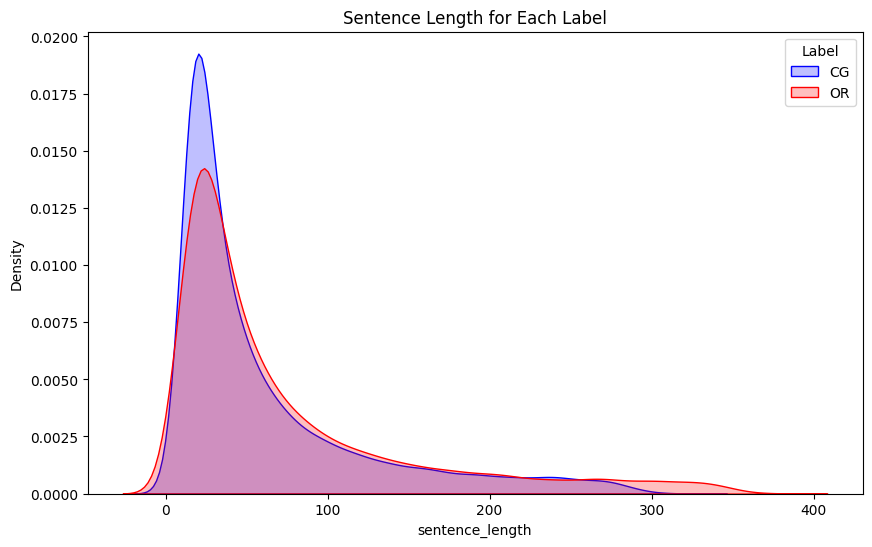

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['label'] == 0], x='sentence_length', fill=True, color='blue', label='CG')
sns.kdeplot(data=df[df['label'] == 1], x='sentence_length', fill=True, color='red', label='OR')
plt.title('Sentence Length for Each Label')
plt.legend(title="Label")
plt.show()
plt.savefig(os.path.join(output_dir, "sentence_length.png"))
plt.close()

##### Conclusion
>As we can see the distribution of setence length most reviews lie between 0 to 100 and most amount of computer generated reivews also lie there and only human written reviews have more than 300 sentence length
><br></br> 

#### Question : Since setence length is varying then how much variation is there for the words used in reviews

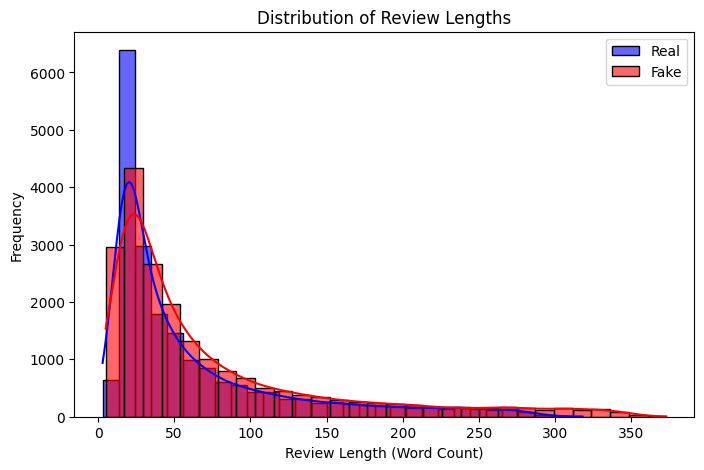

In [ ]:
df["review_length"] = df["deep_translated_text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df[df["label"] == 0]["review_length"], bins=30, kde=True, label="CG", color="blue", alpha=0.6)
sns.histplot(df[df["label"] == 1]["review_length"], bins=30, kde=True, label="OR", color="red", alpha=0.6)
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.legend()
plt.show()
plt.savefig(os.path.join(output_dir, "review_length_distribution.png"))
plt.close()

##### Conclusion
>Turns out that more than 5000 reviews wriiten by human are in 10 to 20 word reviews and if it's less than 10 then it's hightly likely that it was written by computer as we the first piller to be very large for fake reviews
><br></br>

#### Question : Does sentiment polarity different for both of our labels

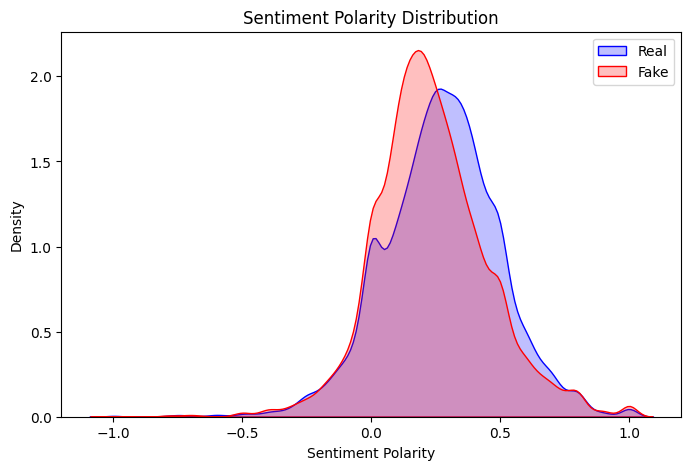

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["label"] == 0]["sentiment_polarity"], label="Real", color="blue", fill=True)
sns.kdeplot(df[df["label"] == 1]["sentiment_polarity"], label="Fake", color="red", fill=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Density")
plt.title("Sentiment Polarity Distribution")
plt.legend()
plt.show()
plt.savefig(os.path.join(output_dir, "sentiment_polarity_distribution.png"))
plt.close()


##### Conclusion
>No there is not much variation in sentiment of message for both computer generated and human generated reviews which makes sense since the difficulty in finding out which reivews is written by human and which by computer is because they look very simpilar in meaning and sentiment.
><br></br>

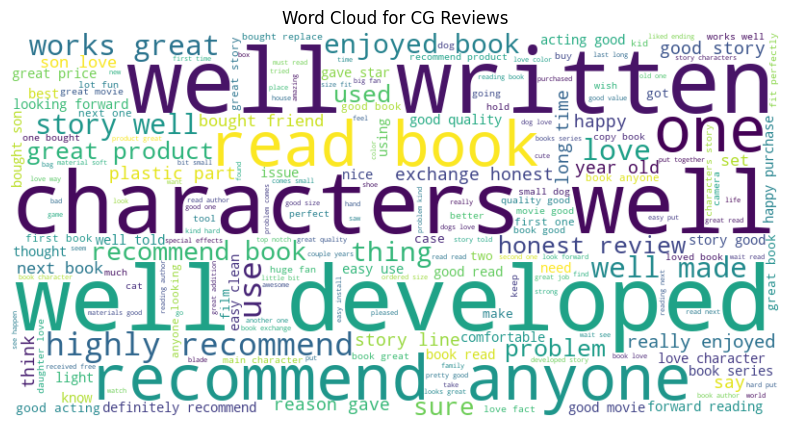

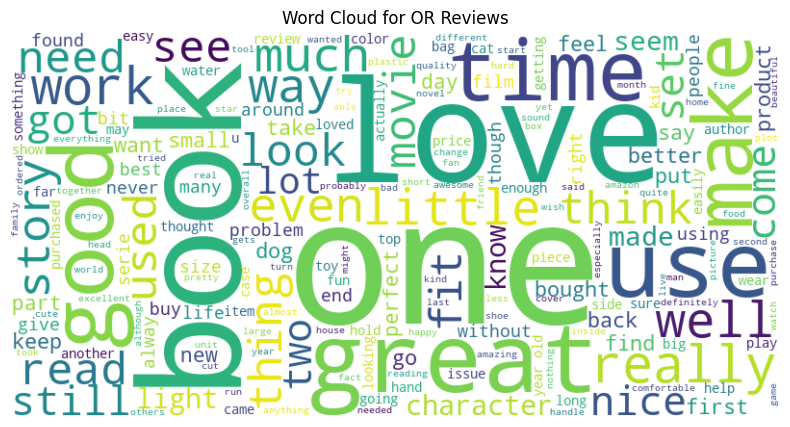

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords

# Load dataset
file_path = "../Data/Pre-processed/translated_output.csv"
df = pd.read_csv(file_path)

# Ensure label column exists
if "label" not in df.columns or "deep_translated_text" not in df.columns:
    raise ValueError("Dataset must contain 'label' and 'deep_translated_text' columns.")

# Define a function to clean text
def preprocess_text(text_series):
    stop_words = set(stopwords.words("english"))
    return " ".join(
        word.lower()
        for text in text_series.dropna().astype(str)
        for word in re.findall(r"\b\w+\b", text)
        if word.lower() not in stop_words
    )

# Generate word clouds for each label
for label in df["label"].unique():
    label_text = preprocess_text(df[df["label"] == label]["deep_translated_text"])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(label_text)

    # Save and display the word cloud
    image_path = f"../Reports/wordcloud_{label}.png"
    wordcloud.to_file(image_path)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {label} Reviews")
    plt.show()

     # print(f"Saved word cloud for {label} reviews: {image_path}")
